# Auto-graded

In this assignment, you will be required to import three external packages (`scikit-learn`, `autograd`, and `scipy`) that were introduced in the lectures and write a few lines of codes with some useful objects in each package. This practice will provide you with an abstract idea of object-oriented programming (OOP). There is no need to know what exactly OOP means, but for the purpose of this course you can think of it as **using programmable "objects" made by others to save time**.

## 1. scikit-learn (15 pts)

`scikit-learn` is the most popular Python package that provides a plethora of useful functions and objects in machine learning. You will go through a workflow of building a simple regression model using `scikit-learn`. You will need to use this skill a lot to build more complicated models for the rest of the semester.

Let's import the `scikit-learn` package (no alias needed). (2.5 pts)

In [11]:
########################################
# Start your code here
import sklearn
########################################

In [12]:
assert sklearn.__version__, "scikit-learn not imported"

Simple linear regression can be implemented with `scikit-learn`. First, declare a `LinearRegression` model with a variable name `lr`. (2.5 pts)

In [13]:
########################################
# Start your code here
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
########################################

In [15]:
assert type(lr) == sklearn.linear_model.LinearRegression

The `LinearRegression` object takes several parameters (or arguments) so that users can easily change the model settings.  You can see the details of parameters as well as the model itself in the [official documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#). In most cases, `scikit-learn` developers have already set the default value for each parameter. For `LinearRegression`, the `fit_intercept` parameter indicates whether the model will add an intercept column to the input matrix during the training process. The default value for `fit_intercept` is `True`.

Change `fit_intercept` of `lr` to `False`. (2.5 pts)

In [16]:
########################################
# Start your code here
lr.fit_intercept = False
########################################

In [17]:
assert lr.fit_intercept == False, "fit_intercept is True"

Write a function `return_coeff` that takes training data `X` and target values `y` as arguments. In this function, a `LinearRegression` model is trained with `X` and `y` and the resulting coefficients of the model should be returned. Make sure that `fit_intercept` is set to `False`. The data type of the returned variable should be `list`. (7.5 pts)

In [18]:
def return_coeff(X, y):
########################################
# Start your code here
    lr = LinearRegression(fit_intercept = False)
    lr.fit(X, y)
    
    return list(lr.coef_)
########################################

In [20]:
import pandas as pd
import numpy as np

df = pd.read_csv('ethanol_IR.csv')

X = df['wavenumber [cm^-1]'].values[400:500].reshape(-1, 1)
y = df['absorbance'].values[400:500].reshape(-1, 1)

assert np.isclose(np.linalg.norm(return_coeff(X, y)) * np.linalg.norm(return_coeff(y, X)) , 0.3386552059454705), "return_coeff not correct"
assert type(return_coeff(X, y)) == list, "the return values should be in list!"

## 2. Gradient Descent with autograd (20 pts)

In this problem, you will implement gradient descent optimization with functions in the `autograd` package. We will fit IR spectrum peaks with multiple Gaussians to find the optimal positions and widths of the peaks.

$$y = \sum^N_{i=0} w_i exp(-\frac{(x-\mu_i)^2}{2\sigma_i^2})$$

First, import `autograd`. (2.5 pts)

In [21]:
########################################
# Start your code here
import autograd
########################################

In [22]:
assert autograd, "autograd not imported"

To implement gradient descent method, you need a well-defined loss function. Create a function `loss` which returns mean-squarred-error of the estimation. `loss` takes the following arguments:

- a parameter vector `lamda` $\vec{\lambda} = [\vec{w}, \vec{\mu}, \vec{\sigma}]$ (1-dimensional numpy array)
- a training data `X` (wavenumbers in this case) (1-dimensional numpy array)
- a target values `y` (absorbance in this case) (1-dimensional numpy array)
- a number of Gaussians `N` (int)

You may assume that the length of `lamda` is 3 x `N`. (5 pts)

In [23]:
def loss(lamda, X, y, N):
########################################
# Start your code here
    predict = np.zeros(X.shape[0])
    for i in range(N):
        predict += lamda[i] * np.exp(-(X - lamda[i+N])**2 / 2 / lamda[i+2*N]**2)
        
    return ((predict-y)**2).mean()
########################################

In [24]:
import pandas as pd
import numpy as np

df = pd.read_csv('ethanol_IR.csv')

X = df['wavenumber [cm^-1]'].values[500:520]
y = df['absorbance'].values[500:520]

l1 = np.array([5., 5., 5., 3000., 3200., 3300., 50., 50., 50.])
ans = loss(l1, X, y, 3)

l2 = np.array([10., 11., 12., 13., 14., 2850, 2900., 2950, 3000., 3050., 30., 40., 50., 60., 70.])
ans *= loss(l2, X, y, 5)

assert np.isclose(ans, 2.2449682077520627), "loss function not correct"

Using the `grad` function in the `autograd` package, create a function `diff_g` that returns the derivative of the `loss` function with respect to `lamda`. You may assume that `N` equals to 3. (5 pts)

In [25]:
import autograd.numpy as np
from autograd import grad

In [26]:
########################################
# Start your code here
def g(lamda, X = X, y = y, N = 3):
    return loss(lamda, X, y, N)

diff_g = grad(g)
########################################

In [27]:
l1 = np.array([5., 5., 5., 3000., 3200., 3300., 50., 50., 50.])
assert np.isclose(np.linalg.norm(diff_g(l1)), 0.0034468711), "diff_g not correct"

Finally, write a function `grad_descent` that implements gradient descent method. This function returns the optimal `lamda` and takes the following arguments:
- a parameter vector `lamda` $\vec{\lambda}$ (1-dimensional numpy array)
- a derivative function `diff_g` (function)
- a step size `h` (float)
- a tolerance `tol` (float)

In numerical optimization, it is very important to set a proper convergence criterion. Optimization should stop once the criterion meets. Various options are available, but, for now, you will compare the the $L_2$ norm of (`current_lamda` - `previous_lamda`) to `tolerance`. If the norm is smaller than `tolerance`, your code should give the `lamda` at that iteration as the optimal solution. (7.5 pts)

In [28]:
def grad_descent(lamda, diff_g, h, tol):
########################################
# Start your code here
    err = np.inf
    previous_lamda = lamda
    while err > tol:
        current_lamda = previous_lamda - h * np.array(diff_g(previous_lamda))
        err = np.linalg.norm(current_lamda - previous_lamda)
        previous_lamda = current_lamda
        
    return current_lamda
########################################

In [29]:
l1 = np.array([5., 5., 5., 3000., 3200., 3300., 50., 50., 50.])
assert np.isclose(np.linalg.norm(grad_descent(l1, diff_g, .1, .001)), 5489.76999348897)

## 3. scipy (15 pts)

You will simplify the code that you have written in the previous problem by taking advantage of `scipy` package. `minimize` function in the `scipy` package, which supports numerical optimization and is faster and more reliable. You will find that how convenient and fast it is to code when you find a right function from the internet that fits your interest or intention, although it's always good to have a basic understanding of what is happening "under the hood". For more information on the `minimize` function, refer to the [official documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).

Import the `minimize` function from `scipy`. (2.5 pts)

In [30]:
########################################
# Start your code here
from scipy.optimize import minimize
########################################

In [31]:
assert minimize, "minimize not imported"

As covered in the lecture, the `minimize` function requires a loss function of which only one argument is unknown. Write a function `g` that takes the same argument as `loss` does, while `X`, `y`, and `N` is predefined and only `lamda` remains unknown. The returned value of `g` should be the same as that of `loss` function. The default values for `X`, `y`, and `N` are provided below. You may wish to review the lecture notes if you are unsure of how to do this. (2.5 pts)

In [32]:
df = pd.read_csv('ethanol_IR.csv')

X = df['wavenumber [cm^-1]'].values[500:520]
y = df['absorbance'].values[500:520]

N = 3

In [33]:
########################################
# Start your code here
def g(lamda, X = X, y = y, N = 3):
    return loss(lamda, X, y, N)
########################################

In [34]:
l = np.array([10., 11., 12., 13., 14., 2850, 2900., 2950, 3000., 3050., 30., 40., 50., 60., 70.])
assert np.isclose(g(l, X, y, 5), 290.43601541265457)

Minimize the `g` function with respect to `lamda` by using the scipy `minimize` function. You should use the `L-BFGS-B` algorithm for the optimization.  Save the result to a variable `res`. The initial guess for `lamda` is provided below. The `BFGS` family of algorithms are a good default since they are usually fast and robust. The details of how the algorithms work are beyond this course, but you can read about them [here](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm). The short version is that they use clever math to optimize the gradient direction and step size used at each iteration. (10 pts)

In [35]:
init_lamda = np.array([8., 10., 9., 3000., 3500., 3200., 50., 50., 50.])

In [36]:
########################################
# Start your code here
res = minimize(g, init_lamda, method = 'L-BFGS-B')
########################################

In [37]:
assert np.isclose(np.linalg.norm(res.x), 5612.256072835871)

# Peer-graded

In this part of the assignment, you will be asked to implement linear regression and nonlinear regression to fit the IR spectrum data with multiple Gaussians.

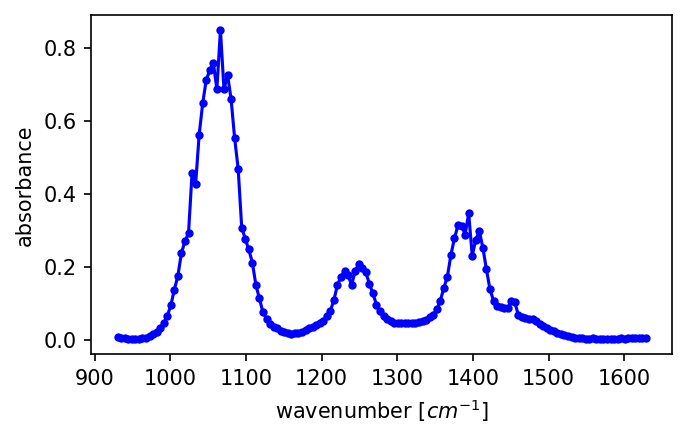

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('ethanol_IR.csv')
x_all = df['wavenumber [cm^-1]'].values
y_all = df['absorbance'].values

x_peak = x_all[100:250]
y_peak = y_all[100:250]

fig, ax = plt.subplots(figsize = (5, 3), dpi = 150)
ax.plot(x_peak, y_peak, '-b', marker = '.')
ax.set_xlabel('wavenumber [$cm^{-1}$]')
ax.set_ylabel('absorbance');

## 1. Gaussian Features

You will create a set of evenly-spaced Gaussians which will be used as features in the next step. First, write a function `gaussian_features` that generates `N` evenly-spaced Gaussians with a fixed width `sigma` in a given range of `x`. The return value `features` should be an array (or matrix) with dimensions of (length of `x` X `N`).

In [40]:
def gaussian_features(x, N, sigma):
########################################
# Start your code here
########################################
    features = np.zeros((len(x), N))
    xk = np.linspace(x.min(), x.max(), N)
    for i in range(N):
        features[:, i] = np.exp( -(x - xk[i])**2 / 2 / sigma**2)
    return features

Use `gaussian_features` to plot 6 evenly-spaced Gaussians from 900 to 1700 with resolution of 150 (e.g. `len(x)=150`) and a width of 100 (e.g. `sigma=100`).

#### Please note that in this question we asked to generate the features for datapoints in between 900 to 1700 with a resolution of 150. Ideally, we should use the data in `x_peak` to generate these features and use regression models on those features. Don't deduct points in peer-grading if students have used either `x = np.linspace(900, 1700, 150)` or `x = x_peak`. 

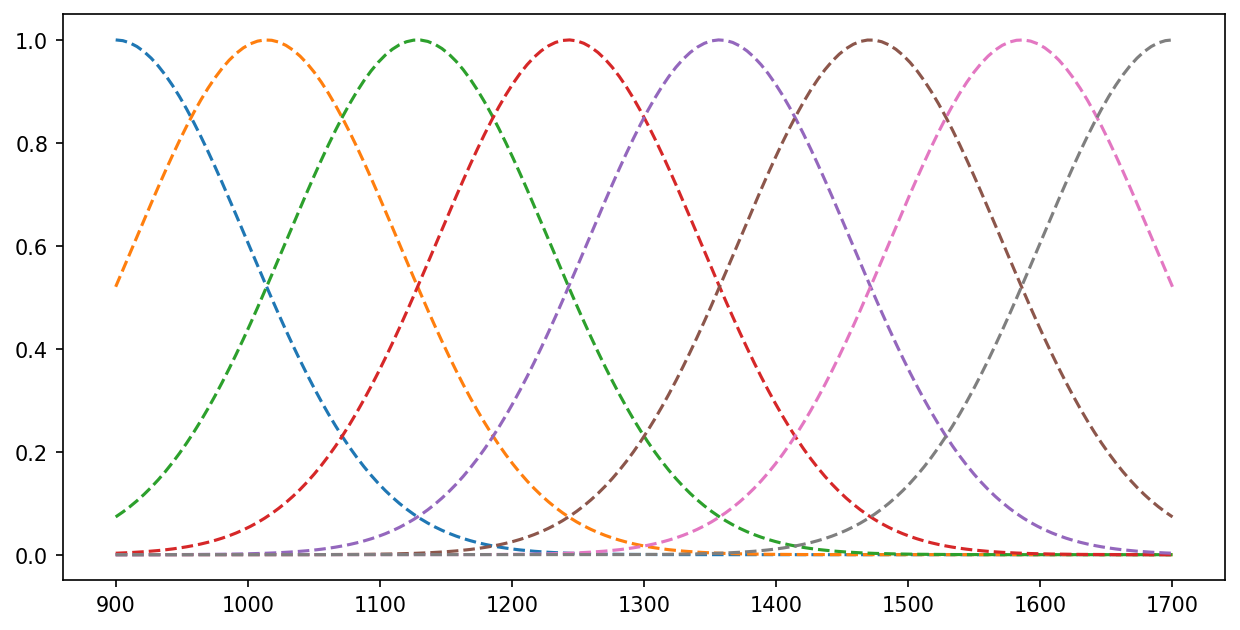

In [41]:
import numpy as np

x = np.linspace(900, 1700, 150) 
features = gaussian_features(x, 8, 100)

fig, ax = plt.subplots(figsize = (10, 5), dpi = 150)
for i in range(features.shape[1]):
    ax.plot(x, features[:, i], '--')

You want to fit `y_peak` with these newly created Gaussian features. Using general linear regression with the new features, plot the result of regression along with the original `y_peak`. You may add an intercept column to determine whether adding an intercept results in a better fitting.

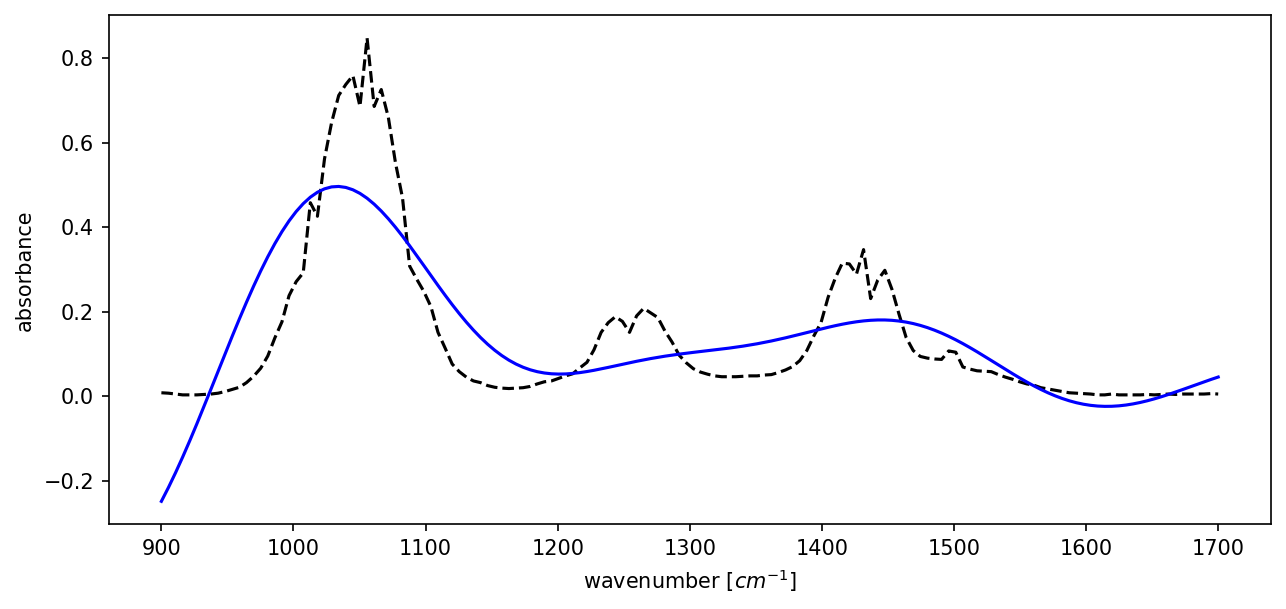

In [42]:
# no intercept

x = np.linspace(900, 1700, 150)
features = gaussian_features(x, 8, 100)

A = features.T@features
b = features.T@y_peak

w = np.linalg.solve(A, b)

fig, ax = plt.subplots(figsize = (10, 4.5), dpi = 150)
ax.plot(x, y_peak, '--k')
ax.plot(x, features@w, '-b')

ax.set_xlabel('wavenumber [$cm^{-1}$]')
ax.set_ylabel('absorbance');

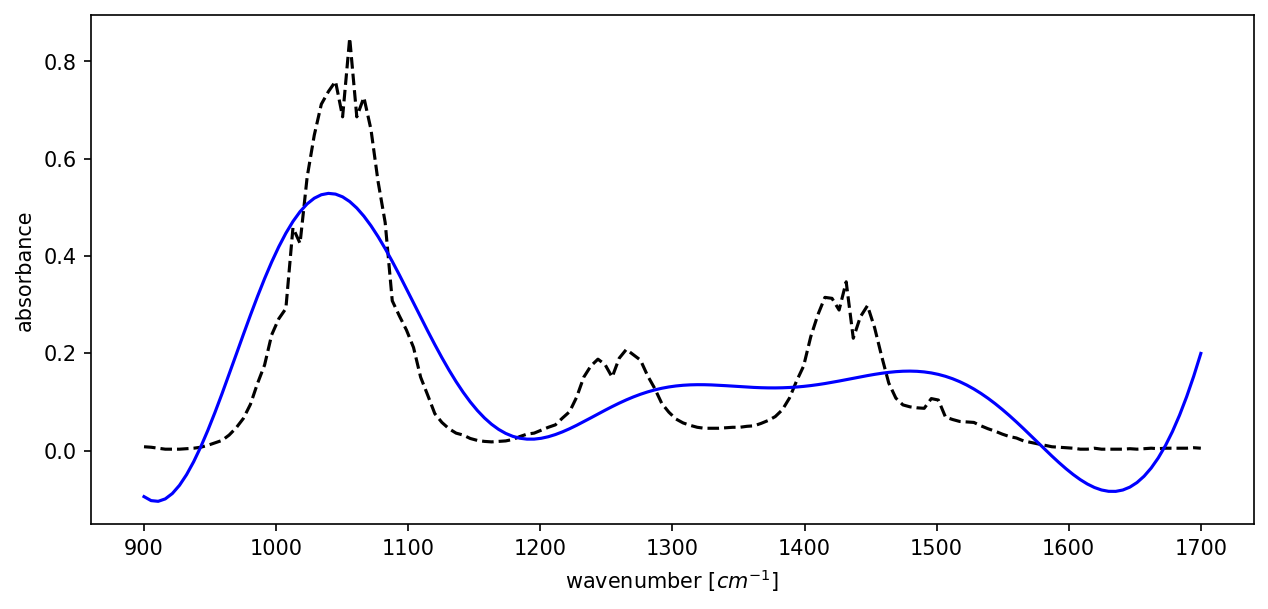

In [43]:
# with intercept

x = np.linspace(900, 1700, 150)
features = gaussian_features(x, 8, 100)

## intercept column
intercept = np.ones((features.shape[0], 1))

## pad the intercept column to the features matrix
features_w_int = np.append(intercept, features, axis = 1)

A = features_w_int.T@features_w_int
b = features_w_int.T@y_peak

## w.shape will be (9,) which was originally (8,)
w = np.linalg.solve(A, b)

fig, ax = plt.subplots(figsize = (10, 4.5), dpi = 150)
ax.plot(x, y_peak, '--k')
ax.plot(x, features_w_int@w, '-b')

ax.set_xlabel('wavenumber [$cm^{-1}$]')
ax.set_ylabel('absorbance');

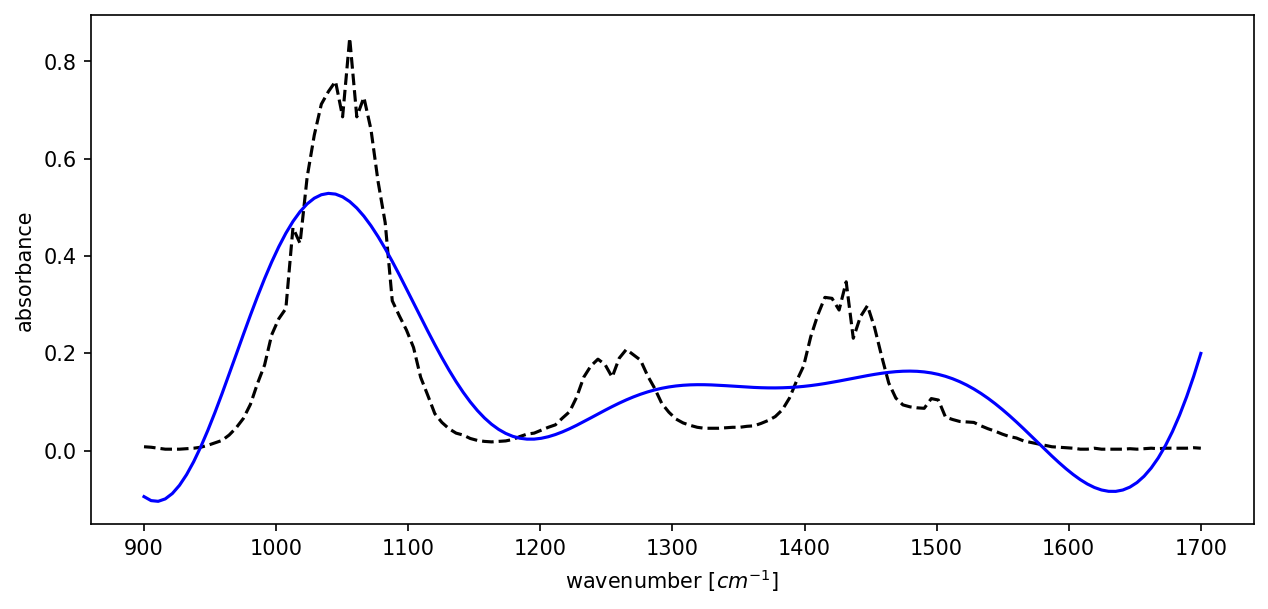

In [44]:
# using LinearRegression from scikit-learn with fit_intercept = True
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(features, y_peak)
y_hat = lr.predict(features)

fig, ax = plt.subplots(figsize = (10, 4.5), dpi = 150)
ax.plot(x, y_peak, '--k')
ax.plot(x, y_hat, '-b')

ax.set_xlabel('wavenumber [$cm^{-1}$]')
ax.set_ylabel('absorbance');

Increase the number of Gaussians to 30. Repeat the linear regression and plot the results again.

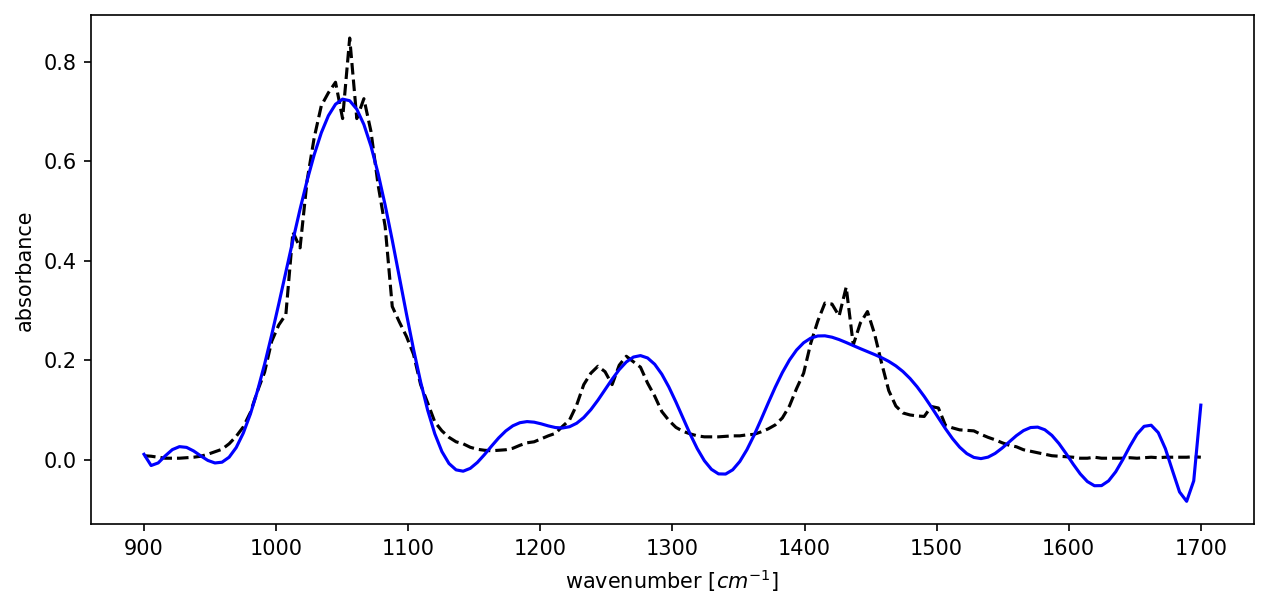

In [56]:
x = np.linspace(900, 1700, 150)
features_w_int = gaussian_features(x, 30, 100)
    
## intercept column
intercept = np.ones((features_w_int.shape[0], 1))

## pad the intercept column to the features matrix
features_w_int = np.append(intercept, features_w_int, axis = 1)

A = features_w_int.T@features_w_int
b = features_w_int.T@y_peak

## w.shape will be (9,) which was originally (8,)
w = np.linalg.solve(A, b)

fig, ax = plt.subplots(figsize = (10, 4.5), dpi = 150)
ax.plot(x, y_peak, '--k')
ax.plot(x, features_w_int@w, '-b')

ax.set_xlabel('wavenumber [$cm^{-1}$]')
ax.set_ylabel('absorbance');

In which case do you think the fitting worked better? How would the number of Gaussians affect the fitting quality? Briefly describe your answer.

## 2. Nonlinear Regression

In the previous problem, we set widths of multiple Gaussians to be the same. Next, we will remove this constraint by implementing nonlinear regression. We have already covered how to find the optimal widths and positions of Gaussians in the autograded section of this assignment. Use the `grad_descent` function you've made and fit `y_peak` with 3 Gaussians. Plot the results along with `y_peak`. You should be able to set the initial guesses yourself using a combination of intuition, results from generalized linear regression, and trial and error.

In [57]:
import autograd.numpy as np
from autograd import grad

In [58]:
def loss(lamda, X, y, N):
    y_i = np.zeros(len(y))
    for i in range(N):
        y_i += lamda[i] * np.exp(-(X-lamda[i+N])**2 / 2 / lamda[i+2*N]**2)
    return ((y - y_i)**2).mean()

def g(lamda, X = x_peak, y = y_peak, N = 3):
    return loss(lamda, X, y, N)

diff_g = grad(g)

def grad_descent(lamda, diff_g, h, tol):
    err = np.inf
    current_lamda = lamda
    while err > tol:
        new_lamda = current_lamda - h * np.array(diff_g(current_lamda))
        err = np.linalg.norm(current_lamda - new_lamda)
        current_lamda = new_lamda
        
    return new_lamda

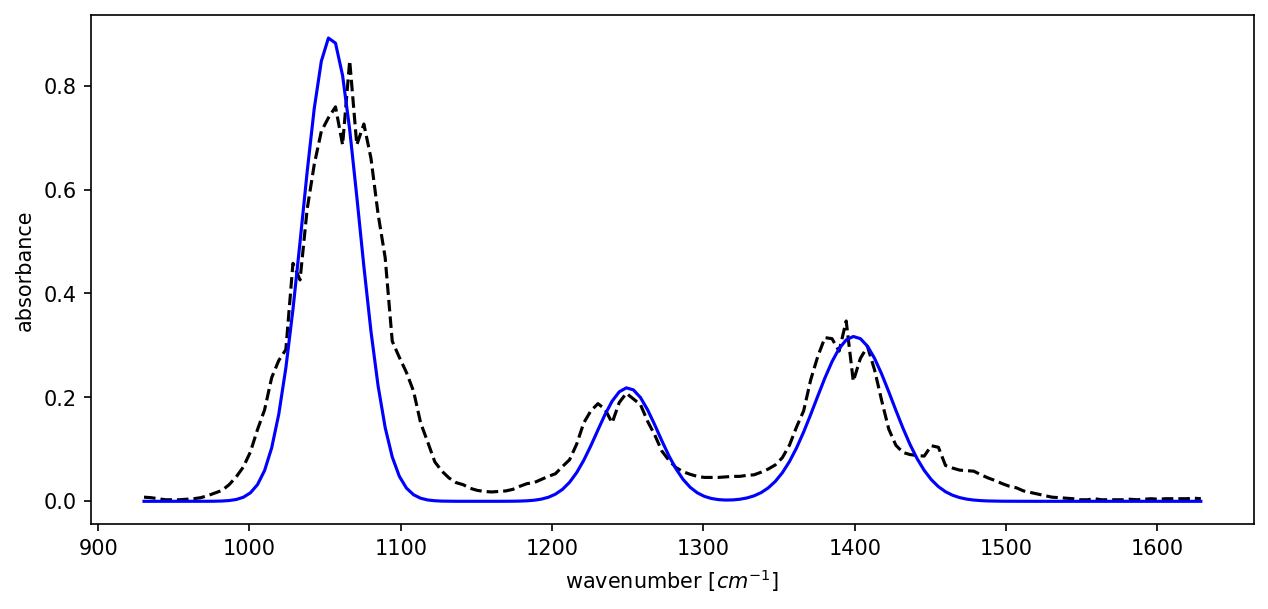

In [59]:
init_lamda = init_lamda = np.array([0.6, 0.7, 0.3, 1050., 1250., 1400., 10., 20., 25.])
opt_lamda = grad_descent(init_lamda, diff_g, 0.1, 0.0001)

y_hat = np.zeros(len(y_peak))
for i in range(3):
    y_hat += opt_lamda[i] * np.exp(-(x_peak-opt_lamda[i+3])**2 / 2 / opt_lamda[i+2*3]**2)
    
fig, ax = plt.subplots(figsize = (10, 4.5), dpi = 150)
ax.plot(x_peak, y_peak, '--k')
ax.plot(x_peak, y_hat, '-b')

ax.set_xlabel('wavenumber [$cm^{-1}$]')
ax.set_ylabel('absorbance');

Repeat the gradient descent with 7 Gaussians. Print the weights.

In [60]:
def loss(lamda, X, y, N):
    y_i = np.zeros(len(y))
    for i in range(N):
        y_i += lamda[i] * np.exp(-(X-lamda[i+N])**2 / 2 / lamda[i+2*N]**2)
    return ((y - y_i)**2).mean()

def g(lamda, X = x_peak, y = y_peak, N = 7):
    return loss(lamda, X, y, N)

diff_g = grad(g)

def grad_descent(lamda, diff_g, h, tol):
    err = np.inf
    current_lamda = lamda
    while err > tol:
        new_lamda = current_lamda - h * np.array(diff_g(current_lamda))
        err = np.linalg.norm(current_lamda - new_lamda)
        current_lamda = new_lamda
        
    return new_lamda

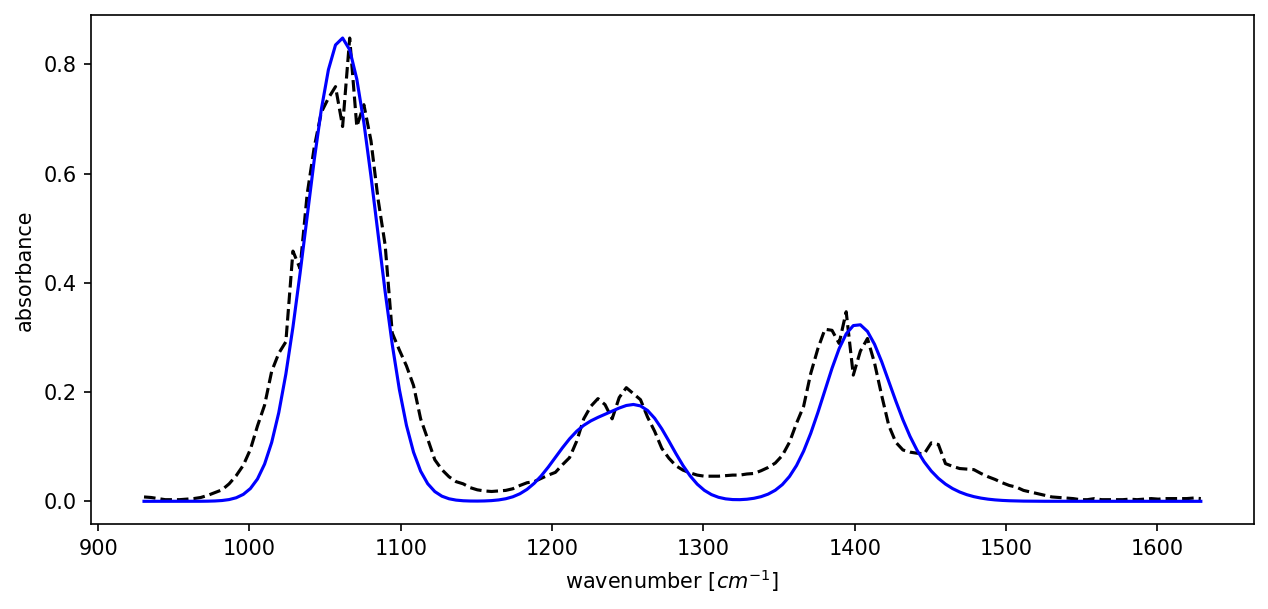

In [61]:
init_lamda = init_lamda = np.array([0.6, 0.7, 0.3, 0.3, 0.3, 0.3, 0.3, 1050., 1060., 1070., 1220., 1260., 1400., 1410., 20., 20., 20., 20., 20., 20., 30.])
opt_lamda = grad_descent(init_lamda, diff_g, 0.1, 0.0001)

y_hat = np.zeros(len(y_peak))
for i in range(7):
    y_hat += opt_lamda[i] * np.exp(-(x_peak-opt_lamda[i+7])**2 / 2 / opt_lamda[i+2*7]**2)
    
fig, ax = plt.subplots(figsize = (10, 4.5), dpi = 150)
ax.plot(x_peak, y_peak, '--k')
ax.plot(x_peak, y_hat, '-b')

ax.set_xlabel('wavenumber [$cm^{-1}$]')
ax.set_ylabel('absorbance');

As the number of Gaussians taking place in nonlinear regression increases, it is more likely to have some negative weights as a result. However, we want our results to be an interpolation of positive peaks only, making the regression more physically relevant. Therefore, let's add a constraint that all weights should be positive. Modify the loss function to meet the new constraint. You can provide the answer by editing the loss function in a code block or by proposing a new analytic loss function. You do not need to apply the new loss function, but doing so may help you check your answer.

In [9]:
def loss_mod(lamda, X, y, N):
    y_i = np.zeros(len(y))
    for i in range(N):
        y_i += lamda[i] * np.exp(-(X-lamda[i+N])**2 / 2 / lamda[i+2*N]**2)
        
    # penalize the negative weights (soft constraint)
    MSE = ((y-y_i)**2).mean()
    weights = lamda[:N]
    return MSE + np.linalg.norm(abs(weight) - weight)

In [10]:
def loss_mod(lamda, X, y, N):
    y_i = np.zeros(len(y))
    # force weights to be positive (hard constraint)
    for i in range(N):
        y_i += abs(lamda[i]) * np.exp(-(X-lamda[i+N])**2 / 2 / lamda[i+2*N]**2)
    
    return ((y-y_i)**2).mean()
